In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
import tensorflow.keras.utils as tku

In [3]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784')

C:\Users\rasaa\Downloads\Handwriting detection\Handwriting\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
print(mnist)

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ..

In [5]:
X,y=mnist['data'],mnist['target']
print(X)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel7

In [6]:
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [14]:
demo_digit=X.iloc[675].values
demo_digit=demo_digit.reshape(28,28)

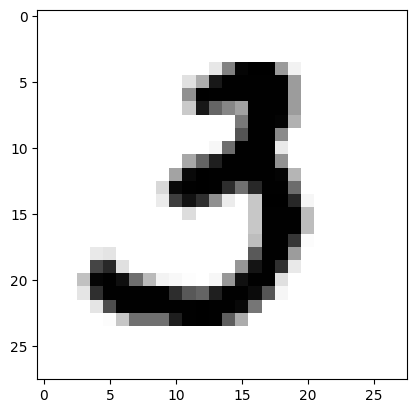

In [15]:

plt.imshow(demo_digit,cmap=matplotlib.cm.binary,interpolation='nearest');

In [19]:
print(y[675])

3


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=True)


In [17]:
cnn=tf.keras.models.Sequential()

In [21]:
cnn.add(tf.keras.layers.Dense(64,activation='relu',input_dim=784))
cnn.add(tf.keras.layers.Dense(64,activation='relu'))
cnn.add(tf.keras.layers.Dense(10,activation='softmax'))

In [22]:
cnn.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [23]:
cnn.fit(X_train,tku.to_categorical(y_train),epochs=5,batch_size=32)

Epoch 1/5
1750/1750 [==============================] - 3s 1ms/step - loss: 1.5356 - accuracy: 0.8321
Epoch 2/5
1750/1750 [==============================] - 2s 1ms/step - loss: 0.3803 - accuracy: 0.9042
Epoch 3/5
1750/1750 [==============================] - 2s 1ms/step - loss: 0.2838 - accuracy: 0.9261
Epoch 4/5
1750/1750 [==============================] - 2s 1ms/step - loss: 0.2536 - accuracy: 0.9331
Epoch 5/5
1750/1750 [==============================] - 2s 1ms/step - loss: 0.2064 - accuracy: 0.9437


In [24]:
cnn.evaluate(X_test,tku.to_categorical(y_test))

438/438 [==============================] - 0s 826us/step - loss: 0.2352 - accuracy: 0.9427


[0.23517891764640808, 0.942714273929596]

In [27]:
test_image=X.iloc[675].values

In [28]:
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
print(result)

1/1 [==============================] - 0s 117ms/step
[[5.8692939e-14 2.2380024e-07 5.7266472e-09 9.9992800e-01 4.3192929e-05
  2.9526132e-06 4.8809801e-09 3.9389576e-09 2.3843393e-05 1.7944130e-06]]
